# Working with Data - Computer Lab for Guest Lecture Julia Lane

In this computer lab we will learn more more details and practice data work to enhance the content of the lecture presented by Julia Lane on responsible data use. We will address a research question, think about data and measurement errors, and manipulate data. 

OUTLINE: 
1. Define a research question 
2. Think about what data are available 
3. Think about possible measurement errors 
4. Think about the interpretation of your results 
5. Inform your results by linking datasets 

# 1. Define a reserach question
Which Community Districts in NYC show the highest number of complaints?

# 2. Think about what data are available
Find suitable data by searching the CUSP Data Catalog https://datahub.cusp.nyu.edu/catalog. You can use Urban Profiler to investigate the Metadata associated with each dataset. Using this tool will help you to decide which attributes of the data you need to answer your question so you don't have to load the entire dataset. 

In [53]:
import os
import pandas as pd
import numpy as np
import re
PUIdata = os.getenv('PUIDATA')
Home = os.getenv('HOME')

import pylab as pl

from pandas.tools.plotting import scatter_matrix

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pd.read_csv('/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9')
data.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

# 3. Think about possible measurement errors
Do you see any problems regarding possible measurement error? Think about who is represented in the data, ommissions, duplications, content error, missing data, etc. What about missing values? Can you detect any patterns? 

In [10]:
# create dataframe with selected columns

data_trim = data[['Unique Key', 'Agency Name', 'Borough', 'Community Board', 'Complaint Type', 'Status', 'Created Date', 'Due Date',
                  'Resolution Description', 'Resolution Action Updated Date', 'Closed Date']]

In [11]:
data_trim.head(100)

,Unique Key,Agency Name,Borough,Community Board,Complaint Type,Status,Created Date,Due Date,Resolution Description,Resolution Action Updated Date,Closed Date
0,31911011,Department of Transportation,BROOKLYN,13 BROOKLYN,Street Condition,Open,11/05/2015 02:59:15 AM,NaN,NaN,11/05/2015 02:59:15 AM,NaN
1,31908754,CHALL,Unspecified,0 Unspecified,Opinion for the Mayor,Email Sent,11/05/2015 02:09:49 AM,11/19/2015 02:10:47 AM,Your comments have been submitted to the Mayor...,NaN,NaN
2,31910423,Department of Parks and Recreation,BROOKLYN,18 BROOKLYN,Root/Sewer/Sidewalk Condition,Open,11/05/2015 02:06:51 AM,12/05/2015 02:06:51 AM,The Department of Parks and Recreation usually...,NaN,NaN
3,31909924,New York City Police Department,BROOKLYN,12 BROOKLYN,Illegal Parking,Assigned,11/05/2015 02:02:20 AM,11/05/2015 10:02:20 AM,Your complaint has been received by the Police...,11/05/2015 02:07:18 AM,NaN
4,31913310,HRA Benefit Card Replacement,Unspecified,0 Unspecified,Benefit Card Replacement,Closed,11/05/2015 01:57:20 AM,NaN,The Human Resources Administration received yo...,NaN,11/05/2015 01:57:31 AM
5,31914148,Department of Transportation,STATEN ISLAND,02 STATEN ISLAND,Highway Condition,Open,11/05/2015 01:55:55 AM,11/15/2015 01:55:55 AM,The Department of Transportation requires 10 d...,NaN,NaN
6,31912764,DPR,Unspecified,0 Unspecified,Agency Issues,Email Sent,11/05/2015 01:55:37 AM,11/19/2015 01:59:29 AM,Your comments have been submitted to the Depar...,NaN,NaN
7,31912611,New York City Police Department,MANHATTAN,08 MANHATTAN,Noise - Commercial,Open,11/05/2015 01:47:12 AM,11/05/2015 09:47:12 AM,Your complaint has been forwarded to the New Y...,NaN,NaN
8,31913909,New York City Police Department,BROOKLYN,06 BROOKLYN,Noise - Commercial,Closed,11/05/2015 01:39:31 AM,11/05/2015 09:39:31 AM,The Police Department responded to the complai...,11/05/2015 02:33:52 AM,11/05/2015 02:35:44 AM
9,31914856,New York City Police Department,BROOKLYN,06 BROOKLYN,Noise - Commercial,Closed,11/05/2015 01:38:35 AM,11/05/2015 09:38:35 AM,The Police Department responded to the complai...,11/05/2015 02:28:24 AM,11/05/2015 02:33:33 AM


## gsm317
In the dataframe above there are many missing date values and makes sense in some instances; if the status of a complaint is
"open" then the values for "resolution action updated date," "closed date" and "resolution description" should be missing. However, if the status is "closed," all of these columns should contain values, but in some cases don't. The Urban Profiler has a useful page that shows columns and the percentage of missing values (http://urbanprofiler.cloudapp.net/dataset/erm2-nwe9/columns). In some cases the columns may not be relavent to the complaint type or data could be missing because of entry error. The training of the operators also contributes, as some information may be considering more critical.

## HW Question
Check if all Boroughs and Community Districts are represented in the Data. How many unique values do we have? 

In [12]:
# creat numpy array for unique community board values and sort results

com_brds = data_trim['Community Board'].unique()
np.sort(com_brds)
print "The number of unique values for Community Board is", len(com_brds)
print com_brds

The number of unique values for Community Board is 77
['13 BROOKLYN' '0 Unspecified' '18 BROOKLYN' '12 BROOKLYN'
 '02 STATEN ISLAND' '08 MANHATTAN' '06 BROOKLYN' '10 BRONX' '06 MANHATTAN'
 '04 BROOKLYN' '04 QUEENS' '09 MANHATTAN' '14 BROOKLYN' '05 MANHATTAN'
 '02 MANHATTAN' '10 QUEENS' '07 QUEENS' '02 QUEENS' '11 BROOKLYN'
 '05 QUEENS' '05 BROOKLYN' '09 QUEENS' '12 MANHATTAN' '01 BROOKLYN'
 '11 MANHATTAN' '03 BRONX' '03 STATEN ISLAND' '08 BROOKLYN' '03 BROOKLYN'
 '07 MANHATTAN' '10 MANHATTAN' '04 BRONX' '01 MANHATTAN' '07 BRONX'
 '09 BRONX' '03 MANHATTAN' '13 QUEENS' '02 BRONX' '12 QUEENS' '16 BROOKLYN'
 '08 QUEENS' '04 MANHATTAN' '14 QUEENS' '10 BROOKLYN' '11 QUEENS'
 '06 BRONX' '08 BRONX' '05 BRONX' '15 BROOKLYN' '02 BROOKLYN' '12 BRONX'
 '03 QUEENS' '06 QUEENS' '01 STATEN ISLAND' '01 BRONX' '01 QUEENS'
 '17 BROOKLYN' '11 BRONX' 'Unspecified QUEENS' '09 BROOKLYN'
 'Unspecified MANHATTAN' 'Unspecified BROOKLYN' '07 BROOKLYN'
 'Unspecified BRONX' '64 MANHATTAN' '81 QUEENS' '55 BROOKLYN

## HW Question
Why do we have so many? Some of them are unspecified, missing. Some might be invalid entries. We should have 59 Community Districts.

## gsm317
Per Wikipedia, community board numbering is as follows: Manhattan (1-12), the Bronx (1-12), Brooklyn (1-18), 
Queens (1-14) and Staten Island (1-3). source: https://en.wikipedia.org/wiki/Community_boards_of_New_York_City

Many of the extra values are unspecified in some manner or incorrect numbers outside range for each borough.

In [13]:
# let's count the number of instances for each unique community board value

data_trim['Community Board'].value_counts()

0 Unspecified                1109446
12 MANHATTAN                  268053
Unspecified BROOKLYN          257844
12 QUEENS                     229383
Unspecified MANHATTAN         229164
Unspecified QUEENS            218268
Unspecified BRONX             199775
03 BROOKLYN                   197306
07 QUEENS                     195961
17 BROOKLYN                   191720
05 BROOKLYN                   189765
14 BROOKLYN                   187794
07 BRONX                      185729
01 BROOKLYN                   185057
01 STATEN ISLAND              182713
04 BRONX                      181953
01 QUEENS                     171484
05 QUEENS                     168570
12 BRONX                      168455
13 QUEENS                     163851
05 BRONX                      161078
18 BROOKLYN                   156100
07 MANHATTAN                  151419
09 QUEENS                     151242
12 BROOKLYN                   150320
03 MANHATTAN                  150296
08 MANHATTAN                  149076
0

## gsm317
The unspecified values for community board make up a large percentage of the total data, included over a million completely unspecified. Therefore, if we drop these values we'll lose a significant amount of data.

## HW Question
Check for duplicates? Are these plausible?

In [14]:
# create list containing rows with duplicate values for unique key

dup_val = []
dup_val = data_trim.set_index('Unique Key').index.get_duplicates()
print 'The number of Unique Key values with a duplicate is', len(dup_val)
print dup_val

The number of Unique Key values with a duplicate is 22
[26002968, 26003579, 26011524, 26011611, 26011682, 26011777, 26012011, 26020332, 26020434, 26028900, 26028912, 26033513, 26033604, 26044811, 26044898, 26045795, 26047763, 26048661, 26048748, 26049793, 26050656, 26050731]


In [15]:
dup_rows = data_trim[data_trim['Unique Key'].isin(dup_val)]
dup_rows.sort(columns='Unique Key')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Unique Key,Agency Name,Borough,Community Board,Complaint Type,Status,Created Date,Due Date,Resolution Description,Resolution Action Updated Date,Closed Date
4253091,26002968,Department of Health and Mental Hygiene,BROOKLYN,04 BROOKLYN,Rodent,Pending,07/25/2013 12:00:00 AM,08/24/2013 07:32:06 AM,The Department of Health and Mental Hygiene wi...,NaN,08/06/2013 12:00:00 AM
4253074,26002968,Department of Health and Mental Hygiene,BROOKLYN,04 BROOKLYN,Rodent,Closed,07/25/2013 12:00:00 AM,08/24/2013 07:32:06 AM,NaN,08/06/2013 12:00:00 AM,08/06/2013 12:00:00 AM
4248297,26003579,Department of Health and Mental Hygiene,STATEN ISLAND,01 STATEN ISLAND,Rodent,Assigned,07/26/2013 12:00:00 AM,08/25/2013 12:33:43 AM,NaN,07/26/2013 12:00:00 AM,08/06/2013 12:00:00 AM
4248298,26003579,Department of Health and Mental Hygiene,STATEN ISLAND,01 STATEN ISLAND,Rodent,Assigned,07/26/2013 12:00:00 AM,08/25/2013 12:33:43 AM,The Department of Health and Mental Hygiene wi...,07/26/2013 12:00:00 AM,08/06/2013 12:00:00 AM
4253097,26011524,Department of Health and Mental Hygiene,MANHATTAN,09 MANHATTAN,Rodent,Closed,07/25/2013 12:00:00 AM,08/24/2013 10:55:27 AM,The Department of Health and Mental Hygiene wi...,08/02/2013 12:00:00 AM,08/02/2013 12:00:00 AM
4253083,26011524,Department of Health and Mental Hygiene,MANHATTAN,09 MANHATTAN,Rodent,Pending,07/25/2013 12:00:00 AM,08/24/2013 10:55:27 AM,NaN,NaN,08/02/2013 12:00:00 AM
4253089,26011611,Department of Health and Mental Hygiene,BRONX,11 BRONX,Rodent,Closed,07/25/2013 12:00:00 AM,08/24/2013 02:14:43 PM,NaN,08/02/2013 12:00:00 AM,08/02/2013 12:00:00 AM
4253100,26011611,Department of Health and Mental Hygiene,BRONX,11 BRONX,Rodent,Pending,07/25/2013 12:00:00 AM,08/24/2013 02:14:43 PM,The Department of Health and Mental Hygiene wi...,08/02/2013 12:00:00 AM,08/02/2013 12:00:00 AM
4253077,26011682,Department of Health and Mental Hygiene,BROOKLYN,04 BROOKLYN,Rodent,Pending,07/25/2013 12:00:00 AM,08/24/2013 04:08:19 PM,NaN,08/06/2013 12:00:00 AM,08/06/2013 12:00:00 AM
4253103,26011682,Department of Health and Mental Hygiene,BROOKLYN,04 BROOKLYN,Rodent,Pending,07/25/2013 12:00:00 AM,08/24/2013 04:08:19 PM,The Department of Health and Mental Hygiene wi...,08/06/2013 12:00:00 AM,08/06/2013 12:00:00 AM


## gms317
Since there are only 22 Unique Key values out of the large dataset, I suspected that it was caused by an error. After looking at the offending rows, it appears they are duplicate complaint entries. In the case of each pair, the status is different and one row has a missing resolution discription.

## HW Question
Data Editing: Is it possible to replace missing values? Is it possible to use Complaint Type to fill missings in Resolution Descriptor?

In [16]:
# create numpy array to determine number of unique resolution discription values

res_des = data_trim['Resolution Description'].unique()
print "The number of unique values for Resolution Discription is", len(res_des)

The number of unique values for Resolution Discription is 1029


In [17]:
# what is the most common complaint type?

data_trim['Complaint Type'].value_counts()

HEATING                              887869
Street Light Condition               582407
Street Condition                     578233
PLUMBING                             508834
GENERAL CONSTRUCTION                 500867
Blocked Driveway                     372960
Water System                         362187
PAINT - PLASTER                      361258
HEAT/HOT WATER                       309975
Traffic Signal Condition             273165
Illegal Parking                      269933
NONCONST                             260890
Noise                                233987
Sewer                                223356
ELECTRIC                             203475
Dirty Conditions                     202165
Damaged Tree                         175633
General Construction/Plumbing        175295
Noise - Street/Sidewalk              161699
Noise - Commercial                   160211
Sanitation Condition                 157081
Building/Use                         157012
Rodent                          

In [18]:
# since HEATING is the largest number of complaint types, how many resolution descriptions are there for HEATING?

heating = data_trim.loc[data_trim['Complaint Type'] == 'HEATING', 'Resolution Description'].value_counts()

print "The number of resolutions for HEATING is", len(heating)
print heating

The number of resolutions for HEATING is 251
The Department of Housing Preservation and Development was not able to gain access to your apartment or others in the building to inspect for a lack of heat or hot water. The complaint has been closed. If the condition still exists, please file a new complaint.                                                                                                       151768
The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint.                                                                                                                  137317
The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.                                                                 

## gsm317
Since there are 251 different resolution discriptions for the HEATING complaint type, I don't think it would be possible to use complaint type to find a missing resolution. However, finding a missing complaint type given a resolution value is possible.

## HW Question
Generate marker for unplausible Community Districts. How do these districts look like?

In [19]:
# create data series to mark bad community boards

cb_marker = data_trim["Community Board"].isin(['0 Unspecified', 'Unspecified QUEENS', 'Unspecified MANHATTAN', 
                                               'Unspecified BROOKLYN',  'Unspecified BRONX', '64 MANHATTAN', 
                                               '81 QUEENS', '55 BROOKLYN', '83 QUEENS', 'Unspecified STATEN ISLAND', 
                                               '28 BRONX', '80 QUEENS', '26 BRONX', '95 STATEN ISLAND', '82 QUEENS',
                                               '27 BRONX', '56 BROOKLYN', '84 QUEENS'])
type(cb_marker)

pandas.core.series.Series

In [20]:
# Drop the marked districts

data_trim['drop_row'] = cb_marker
data_good = data_trim[data_trim.drop_row != True]

drop_per = (float(len(data_trim)) - float(len(data_good))) / float(len(data_trim))
print "The percentage of bad data is", drop_per
data_good.head()

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


The percentage of bad data is 0.203854407335


,Unique Key,Agency Name,Borough,Community Board,Complaint Type,Status,Created Date,Due Date,Resolution Description,Resolution Action Updated Date,Closed Date,drop_row
0,31911011,Department of Transportation,BROOKLYN,13 BROOKLYN,Street Condition,Open,11/05/2015 02:59:15 AM,NaN,NaN,11/05/2015 02:59:15 AM,NaN,False
2,31910423,Department of Parks and Recreation,BROOKLYN,18 BROOKLYN,Root/Sewer/Sidewalk Condition,Open,11/05/2015 02:06:51 AM,12/05/2015 02:06:51 AM,The Department of Parks and Recreation usually...,NaN,NaN,False
3,31909924,New York City Police Department,BROOKLYN,12 BROOKLYN,Illegal Parking,Assigned,11/05/2015 02:02:20 AM,11/05/2015 10:02:20 AM,Your complaint has been received by the Police...,11/05/2015 02:07:18 AM,NaN,False
5,31914148,Department of Transportation,STATEN ISLAND,02 STATEN ISLAND,Highway Condition,Open,11/05/2015 01:55:55 AM,11/15/2015 01:55:55 AM,The Department of Transportation requires 10 d...,NaN,NaN,False
7,31912611,New York City Police Department,MANHATTAN,08 MANHATTAN,Noise - Commercial,Open,11/05/2015 01:47:12 AM,11/05/2015 09:47:12 AM,Your complaint has been forwarded to the New Y...,NaN,NaN,False


In [22]:
# Produce your result: Generate an indicator which ranks the Community District by complaint numbers 
# on the Community district level

data_good = data_good.drop_duplicates(subset='Unique Key')
data_group = data_good['Unique Key'].groupby(data_good['Community Board']).count()
data_group

Community Board
01 BRONX             74631
01 BROOKLYN         185057
01 MANHATTAN         77974
01 QUEENS           171484
01 STATEN ISLAND    182708
02 BRONX             60257
02 BROOKLYN         121021
02 MANHATTAN        133860
02 QUEENS           114333
02 STATEN ISLAND    121132
03 BRONX             75134
03 BROOKLYN         197305
03 MANHATTAN        150296
03 QUEENS           122009
03 STATEN ISLAND    136487
04 BRONX            181953
04 BROOKLYN         139702
04 MANHATTAN        132659
04 QUEENS            99316
05 BRONX            161078
05 BROOKLYN         189765
05 MANHATTAN        142028
05 QUEENS           168570
06 BRONX             99547
06 BROOKLYN         114029
06 MANHATTAN        104249
06 QUEENS            90938
07 BRONX            185729
07 BROOKLYN         107031
07 MANHATTAN        151419
07 QUEENS           195961
08 BRONX             92733
08 BROOKLYN         141118
08 MANHATTAN        149076
08 QUEENS           123131
09 BRONX            147457
09 BROOKLYN 

In [24]:
# Save reduced data frame (Community District level)

data_count = pd.Series.to_frame(data_group).reset_index()
data_count.columns = ['Community_Boards', 'Complaint_Count']
data_count.head()

,Community_Boards,Complaint_Count
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182708


# 4. Think about the interpretation of your results?
What do you have to keep in mind when interpreting your results? Are they generable? Does the way the data is collected influence your results? To better inform city agancies it might be good to explore in more detail the underlying dempgraphics/infrastructure of a Community District becasue this might influence 311 calls. You can do this by merging external data on the Community District level to your analysis data. 

In [25]:
# Population by Community District
df_pop = pd.read_csv(PUIdata + "/Final_Demographics.csv")

In [26]:
# Check variables in file
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [27]:
# How many community districts are in file? 
pop_cb = df_pop['cd_id'].unique()
print "The number of unique Community Boards is", len(pop_cb)

The number of unique Community Boards is 59


## HW Question
Manipulate data to get some information on demographics by Community District. Think about who might be more likely to call 311.

In [29]:
# create data frame of selected population demographics

pop_trim = df_pop[['FIPS', 'cd_id', 'Total Population', 'Population Density (per sq. mile)', 
                   "% Population 25 Years and over: Bachelor's degree or more", 
                   'Median household income (In 2014 Inflation Adjusted Dollars)',  
                   '% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than "very Well"']]
pop_trim.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Population 25 Years and over: Bachelor's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well"""
0,3603701,BX08,106737,31229.95006,39.87,54224,15.24
1,3603702,BX12,134644,19966.67839,23.44,44906,6.07
2,3603703,BX10,121209,12913.81703,27.17,54962,6.92
3,3603704,BX11,135839,35677.95453,24.11,47910,13.66
4,3603705,BX03,172247,39405.79222,11.87,22041,24.14


## gsm317
I decided to use measures of education, wealth, density and lanuage. People with more education and wealth may be more likely to cal 311, while people that don't speak english very well may be less likely. I'm also interested to see if density has an affect on complaints.

In [31]:
# Infrastructure by Community District
df_infr = pd.read_csv(PUIdata + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [32]:
# Check variables in file

df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [33]:
# How many community districts are in file? 

infr_cb = df_infr['Qualifying Name'].unique()
print "The number of unique Community Boards in the Infrastructure dataset is", len(infr_cb)

infr_fips = df_infr['FIPS'].unique()
print "The number of unique FIPS numbers in the Infrastructure dataset is", len(infr_cb)

The number of unique Community Boards in the Infrastructure dataset is 55
The number of unique FIPS numbers in the Infrastructure dataset is 55


In [35]:
# Manipulate data to get some information on internet/broadband useage by Community District
# Aggregate the mobile subscription data and internet type by high and low connections.

df_infr['Households: With Mobile Broadband Aggregated'] = df_infr['Households: With Mobile Broadband'] + \
    df_infr['Households: With Mobile Broadband.1'] + df_infr['Households: With Mobile Broadband.2'] + \
    df_infr['Households: With Mobile Broadband.3'] + df_infr['Households: With Mobile Broadband.4']
    
df_infr['Households: Dial-Up Alone Aggregate'] = df_infr['Households: Dial-Up Alone'] + \
    df_infr['Households: With Dial-Up Internet Subscription Alone']

In [36]:
infr_trim = df_infr[['FIPS', 'Qualifying Name', 'Households', 'Households: With A Broadband Internet Subscription', 
             'Households: With Mobile Broadband Aggregated', 'Households: Dial-Up Alone Aggregate']]
infr_trim.head()

,FIPS,Qualifying Name,Households,Households: With A Broadband Internet Subscription,Households: With Mobile Broadband Aggregated,Households: Dial-Up Alone Aggregate
0,3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,30943,15359,848
1,3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,31435,10486,356
2,3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32333,11425,316
3,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,31278,10748,263
4,3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,33408,14907,176


In [38]:
# convert internet numbers into percentage to compare across community district size.

infr_trim['% Broadband'] = (infr_trim['Households: With A Broadband Internet Subscription'] / infr_trim['Households']) * 100
infr_trim['% Mobile Broadband'] = (infr_trim['Households: With Mobile Broadband Aggregated'] / infr_trim['Households']) * 100
infr_trim['% Dial-Up'] = (infr_trim['Households: Dial-Up Alone Aggregate'] / infr_trim['Households']) * 100

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [40]:
infr_trim.columns

Index([u'FIPS', u'Qualifying Name', u'Households',
       u'Households: With A Broadband Internet Subscription',
       u'Households: With Mobile Broadband Aggregated',
       u'Households: Dial-Up Alone Aggregate', u'% Broadband',
       u'% Mobile Broadband', u'% Dial-Up'],
      dtype='object')

In [41]:
# Save data frame 

infr_final = infr_trim.drop([u'Households: With A Broadband Internet Subscription', u'Households: With Mobile Broadband Aggregated',
       u'Households: Dial-Up Alone Aggregate'], axis=1)
infr_final.head()

,FIPS,Qualifying Name,Households,% Broadband,% Mobile Broadband,% Dial-Up
0,3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,73.612466,36.538599,2.017366
1,3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,70.120455,23.390587,0.794111
2,3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,68.720510,24.282678,0.671626
3,3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,69.627354,23.925916,0.585459
4,3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,58.044339,25.899993,0.305789


# 5. Inform your results by linking datasets
Now you want to link the three data frames to produce summary statistics for Community Districts which show a high number of complaints vs. Community Districts which show a lower number of complaints. Please keep in mind that the identifiers used for the linkage (Community Dostrict IDs) should be recored the same way. Use regular expressions to harmonize the identifiers if possible. The identifiers should look like BK01, BK02, etc.
https://docs.python.org/2/library/re.html

In [42]:
# Harmonize identifier of dataframe 1

data_count.head()

,Community_Boards,Complaint_Count
0,01 BRONX,74631
1,01 BROOKLYN,185057
2,01 MANHATTAN,77974
3,01 QUEENS,171484
4,01 STATEN ISLAND,182708


In [43]:
# split community board into two columns

data_count['a'], data_count['b'] = data_count['Community_Boards'].str.split(' ', 1).str
data_count.head()

,Community_Boards,Complaint_Count,a,b
0,01 BRONX,74631,01,BRONX
1,01 BROOKLYN,185057,01,BROOKLYN
2,01 MANHATTAN,77974,01,MANHATTAN
3,01 QUEENS,171484,01,QUEENS
4,01 STATEN ISLAND,182708,01,STATEN ISLAND


In [44]:
# replace borough name with abbrivation

data_count.replace(to_replace='BRONX', value='BX', inplace=True)
data_count.replace(to_replace='BROOKLYN', value='BK', inplace=True)
data_count.replace(to_replace='MANHATTAN', value='MN', inplace=True)
data_count.replace(to_replace='QUEENS', value='QN', inplace=True)
data_count.replace(to_replace='STATEN ISLAND', value='SI', inplace=True)
data_count.head()

,Community_Boards,Complaint_Count,a,b
0,01 BRONX,74631,01,BX
1,01 BROOKLYN,185057,01,BK
2,01 MANHATTAN,77974,01,MN
3,01 QUEENS,171484,01,QN
4,01 STATEN ISLAND,182708,01,SI


In [45]:
# recombine community board id and creat final data

data_count['cd_id'] = data_count['b'] + data_count['a']
complaints = data_count[['cd_id', 'Complaint_Count']]
complaints.head()

,cd_id,Complaint_Count
0,BX01,74631
1,BK01,185057
2,MN01,77974
3,QN01,171484
4,SI01,182708


In [47]:
# Harmonize identifier of dataframe 2 and 3
# since the FIPS column is in both dataset, I will merge using that.

demos = pd.merge(pop_trim, infr_final, on='FIPS')
demos.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Population 25 Years and over: Bachelor's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Qualifying Name,Households,% Broadband,% Mobile Broadband,% Dial-Up
0,3603701,BX08,106737,31229.95006,39.87,54224,15.24,"NYC-Bronx Community District 8--Riverdale, New...",42035,73.612466,36.538599,2.017366
1,3603702,BX12,134644,19966.67839,23.44,44906,6.07,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,70.120455,23.390587,0.794111
2,3603703,BX10,121209,12913.81703,27.17,54962,6.92,"NYC-Bronx Community District 10--Co-op City, N...",47050,68.720510,24.282678,0.671626
3,3603704,BX11,135839,35677.95453,24.11,47910,13.66,NYC-Bronx Community District 11--Pelham Parkwa...,44922,69.627354,23.925916,0.585459
4,3603705,BX03,172247,39405.79222,11.87,22041,24.14,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,58.044339,25.899993,0.305789


In [87]:
# merge all data using cd_id

final_data = pd.merge(complaints, demos, on='cd_id')
final_data.head()

,cd_id,Complaint_Count,FIPS,Total Population,Population Density (per sq. mile),% Population 25 Years and over: Bachelor's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Qualifying Name,Households,% Broadband,% Mobile Broadband,% Dial-Up
0,BX01,74631,3603710,167147,34412.07524,9.07,21116,37.06,NYC-Bronx Community District 1 & 2--Hunts Poin...,52191,59.316740,28.700351,0.000000
1,BX01,74631,3603710,167147,34412.07524,9.07,21116,37.06,NYC-Bronx Community District 1 & 2--Hunts Poin...,52191,59.316740,28.700351,0.000000
2,BK01,185057,3604001,154713,37671.51058,49.58,57818,5.71,NYC-Brooklyn Community District 1--Greenpoint ...,62990,73.262423,30.982696,1.425623
3,MN01,77974,3603810,159903,53928.05360,81.11,120190,7.54,NYC-Manhattan Community District 1 & 2--Batter...,83976,88.524102,47.221825,0.314376
4,MN01,77974,3603810,159903,53928.05360,81.11,120190,7.54,NYC-Manhattan Community District 1 & 2--Batter...,83976,88.524102,47.221825,0.314376


In [88]:
# drop unneeded rows for the final formated data and save to csv

final_data.drop(['FIPS', 'Qualifying Name'], axis=1, inplace=True)
final_data.to_csv(PUIdata + '/HW8_gsm17_formatted_data')

final_data.head()



,cd_id,Complaint_Count,Total Population,Population Density (per sq. mile),% Population 25 Years and over: Bachelor's degree or more,Median household income (In 2014 Inflation Adjusted Dollars),"% Population 5 Years And Over: Spanish or Spanish Creole: Speak English Less Than ""very Well""",Households,% Broadband,% Mobile Broadband,% Dial-Up
0,BX01,74631,167147,34412.07524,9.07,21116,37.06,52191,59.316740,28.700351,0.000000
1,BX01,74631,167147,34412.07524,9.07,21116,37.06,52191,59.316740,28.700351,0.000000
2,BK01,185057,154713,37671.51058,49.58,57818,5.71,62990,73.262423,30.982696,1.425623
3,MN01,77974,159903,53928.05360,81.11,120190,7.54,83976,88.524102,47.221825,0.314376
4,MN01,77974,159903,53928.05360,81.11,120190,7.54,83976,88.524102,47.221825,0.314376


## HW Question
Are the demographics and infrastructure different in Community Districts that show more complaints than others?

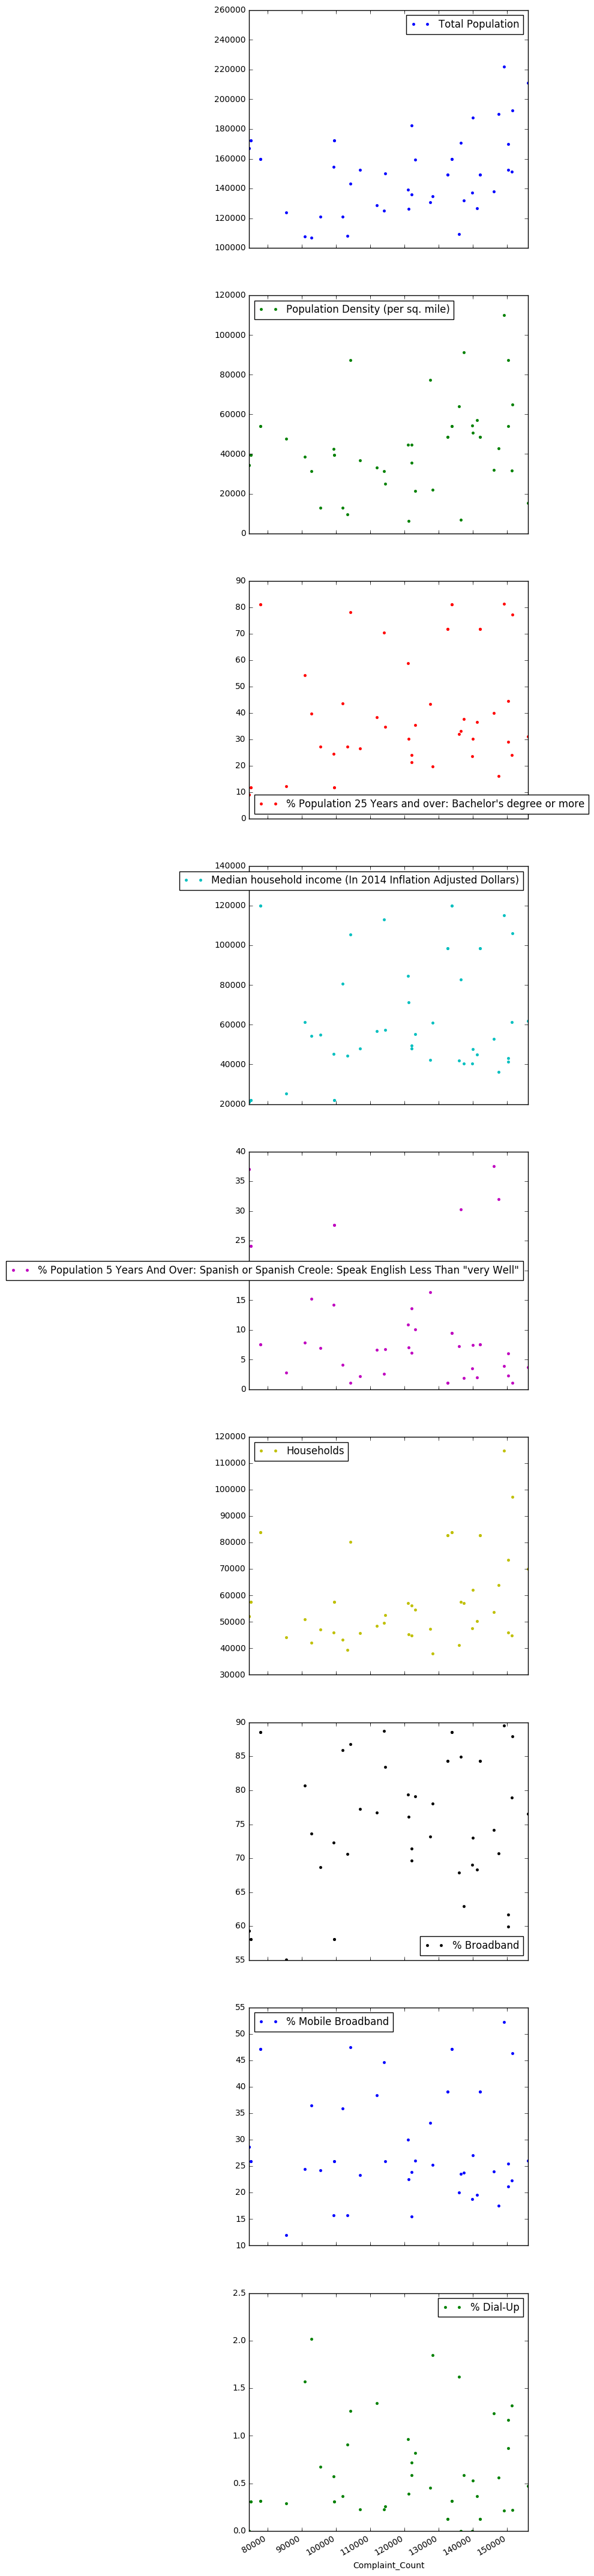

In [83]:
# create scatter plots of complaint count against the demographic and infrastructure values.

col = 'Complaint_Count'
df = final_data.drop(col,axis=1)
df.index = final_data[col]
df.plot(subplots=True, figsize=(6, 60), style='.')
plt.legend(loc='best')
plt.show()

## gsm317
Doing a visual analysis of the data, and it appears that there is a postive relationship between population and complaints, which makes since. The relationship to density is less clear, the may be a positive relation that bares further analysis.
However, the doesn't apear to be a relationship between complaints and education, wealth, no language. There also doesn't appear the be a clear relationship between complaints and internet connectivity.

*Note: I ran out of time on the plot. I realize it doesn't meet typical plot requirements.